In [32]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array,ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model

In [33]:
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/dog-cat-panda.zip",'r') as zip:
  zip.extractall()
  print('Done')
  

Done


In [35]:
file_cat=os.listdir("/content/animals/cats")
print('cat Data')
print(file_cat)
file_dog=os.listdir("/content/animals/dogs")
print('Dog Data')
print(file_dog)

file_panda=os.listdir("/content/animals/panda")
print('Panda Data')
print(file_panda)



cat Data
['cats_00215.jpg', 'cats_00712.jpg', 'cats_00616.jpg', 'cats_00230.jpg', 'cats_00643.jpg', 'cats_00993.jpg', 'cats_00904.jpg', 'cats_00758.jpg', 'cats_00715.jpg', 'cats_00700.jpg', 'cats_00345.jpg', 'cats_00346.jpg', 'cats_00086.jpg', 'cats_00069.jpg', 'cats_00609.jpg', 'cats_00763.jpg', 'cats_00827.jpg', 'cats_00779.jpg', 'cats_00940.jpg', 'cats_00371.jpg', 'cats_00814.jpg', 'cats_00138.jpg', 'cats_00741.jpg', 'cats_00026.jpg', 'cats_00854.jpg', 'cats_00806.jpg', 'cats_00084.jpg', 'cats_00994.jpg', 'cats_00274.jpg', 'cats_00681.jpg', 'cats_00630.jpg', 'cats_00451.jpg', 'cats_00325.jpg', 'cats_00978.jpg', 'cats_00281.jpg', 'cats_00153.jpg', 'cats_00041.jpg', 'cats_00651.jpg', 'cats_00429.jpg', 'cats_00100.jpg', 'cats_00752.jpg', 'cats_00977.jpg', 'cats_00482.jpg', 'cats_00417.jpg', 'cats_00644.jpg', 'cats_00123.jpg', 'cats_00512.jpg', 'cats_00603.jpg', 'cats_00349.jpg', 'cats_00560.jpg', 'cats_00901.jpg', 'cats_00855.jpg', 'cats_00043.jpg', 'cats_00721.jpg', 'cats_00293.jpg', 

In [36]:
for image in file_cat:
    img=os.path.join("/content/animals/cats",image)
    print(img)
    break

/content/animals/cats/cats_00215.jpg


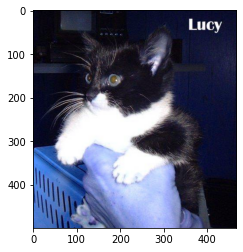

In [37]:
for image in file_cat:
    img=os.path.join("/content/animals/cats",image)
    img_a=cv2.imread(img)
    plt.imshow(img_a)
    break   

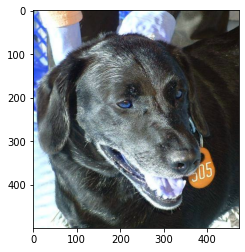

In [38]:
for image in file_dog:
    img=os.path.join("/content/animals/dogs",image)
    img_a=cv2.imread(img)
    plt.imshow(img_a)
    break

In [39]:
value_train=[]
for image in file_cat:
    img=os.path.join("/content/animals/cats",image)
    
    pic=load_img(img,target_size=(100,100))
    pic=img_to_array(pic)
    pics=preprocess_input(pic)
    value_train.append([pics,0])

for image in file_dog:
    img=os.path.join("/content/animals/dogs",image)
    
    pic=load_img(img,target_size=(100,100))
    pic=img_to_array(pic)
    pics=preprocess_input(pic)
    value_train.append([pics,1])

for image in file_panda:
    img=os.path.join("/content/animals/panda",image)
    
    pic=load_img(img,target_size=(100,100))
    pic=img_to_array(pic)
    pics=preprocess_input(pic)
    value_train.append([pics,2])
      

In [40]:
random.shuffle(value_train)


In [41]:
X=[]
Y=[]
for i in range(len(value_train)):
  X.append(value_train[i][0])
  Y.append(value_train[i][1])

In [42]:
X=np.array(X,dtype="float32")
Y=np.array(Y)


In [43]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation ='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D( 32,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(8,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))



model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

model.summary()





Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 21, 21, 16)        4624      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 10, 10, 16)      

In [50]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size = 0.2)

X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.3)

model.fit(X_train, Y_train,epochs =10, validation_data = (X_val, Y_val))

Epoch 1/10
53/53 [==============================] - 36s 671ms/step - loss: 0.2514 - accuracy: 0.9149 - val_loss: 0.3435 - val_accuracy: 0.8653
Epoch 2/10
53/53 [==============================] - 35s 668ms/step - loss: 0.1423 - accuracy: 0.9435 - val_loss: 0.2629 - val_accuracy: 0.9042
Epoch 3/10
53/53 [==============================] - 35s 668ms/step - loss: 0.1024 - accuracy: 0.9679 - val_loss: 0.3303 - val_accuracy: 0.8861
Epoch 4/10
53/53 [==============================] - 35s 663ms/step - loss: 0.0982 - accuracy: 0.9631 - val_loss: 0.2985 - val_accuracy: 0.8986
Epoch 5/10
53/53 [==============================] - 37s 687ms/step - loss: 0.0494 - accuracy: 0.9821 - val_loss: 0.3491 - val_accuracy: 0.8917
Epoch 6/10
53/53 [==============================] - 40s 749ms/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.3005 - val_accuracy: 0.9000
Epoch 7/10
53/53 [==============================] - 36s 672ms/step - loss: 0.0162 - accuracy: 0.9964 - val_loss: 0.3743 - val_accuracy: 0.8917

In [51]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')


19/19 [==============================] - 3s 136ms/step - loss: 0.3182 - accuracy: 0.8983
Accuracy over the test set: 
  89.83 %


According to model the image is of panda


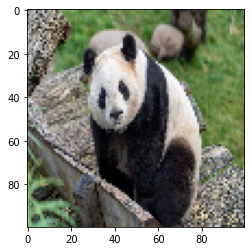

In [52]:
from keras.preprocessing import image
import cv2
pic=load_img("/content/drive/MyDrive/image.jfif",target_size=(100,100))

plt.imshow(pic)
pic=img_to_array(pic)
pics=preprocess_input(pic)
pics = np.expand_dims(pics,axis=0)
category = model.predict(pics)
if category[0][0]==0:
    prediction = 'cat'
elif category[0][0]==1:
    prediction = 'dog'
else:
  prediction='panda'   
print("According to model the image is of",prediction)